In [19]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/svm_dataset.csv')
df.head(6)

,WordCount,LinkCount,HasAttachment,Spam
0,100,5,1,1
1,45,0,0,0
2,78,3,0,0
3,120,7,1,1
4,33,1,0,0
5,90,4,1,1


In [3]:
# Feature matrix and target vector
X = df[['WordCount', 'LinkCount', 'HasAttachment']]
y = df['Spam']

In [5]:
# Dataset analysis - describe and scatter plot of WordCount vs Spam
print(df.describe())

       WordCount  LinkCount  HasAttachment       Spam
count   15.00000  15.000000      15.000000  15.000000
mean    75.60000   3.333333       0.466667   0.466667
std     31.47743   2.845213       0.516398   0.516398
min     33.00000   0.000000       0.000000   0.000000
25%     47.50000   1.000000       0.000000   0.000000
50%     78.00000   3.000000       0.000000   0.000000
75%    102.50000   5.500000       1.000000   1.000000
max    120.00000   8.000000       1.000000   1.000000


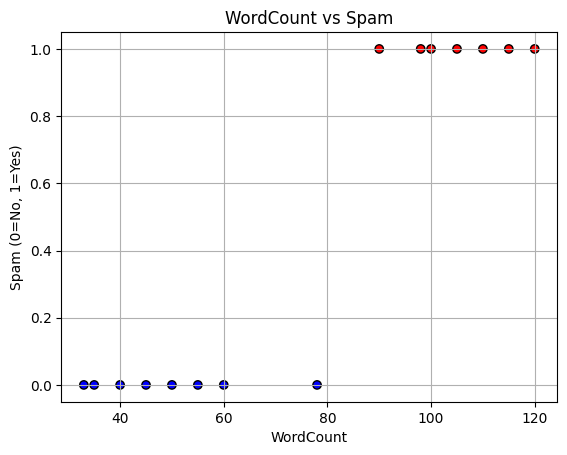

In [6]:
plt.scatter(df['WordCount'], df['Spam'], c=df['Spam'], cmap='bwr', edgecolor='k')
plt.xlabel('WordCount')
plt.ylabel('Spam (0=No, 1=Yes)')
plt.title('WordCount vs Spam')
plt.grid(True)
plt.show()

In [7]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
model = SVC(kernel='linear')

# Train SVM model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [8]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[3]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [17]:
# Test model with new example
new_email = pd.DataFrame({'WordCount': [85], 'LinkCount': [4], 'HasAttachment': [1]})
predicted_class = model.predict(new_email)
print("Prediction for new input (1=Spam, 0=Not Spam):", predicted_class[0])

Prediction for new input (1=Spam, 0=Not Spam): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


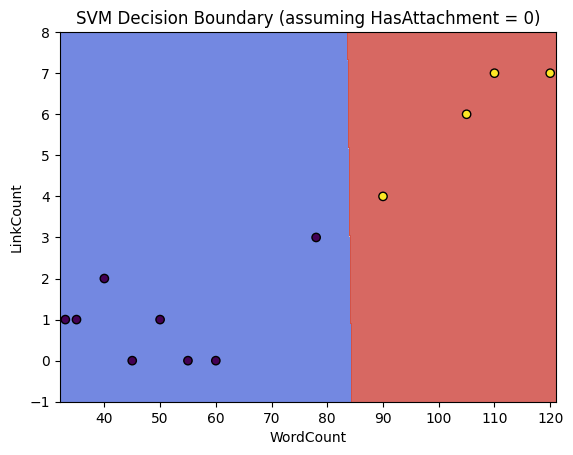

In [21]:
# Create a mesh grid for plotting decision boundary
# We will plot the decision boundary using only WordCount and LinkCount for visualization purposes
# This is a 2D projection and doesn't fully represent the 3D decision boundary with HasAttachment

x_min, x_max = X_train['WordCount'].min() - 1, X_train['WordCount'].max() + 1
y_min, y_max = X_train['LinkCount'].min() - 1, X_train['LinkCount'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

# To use model.predict, we need to provide a third feature.
# For this 2D plot, we will assume HasAttachment is 0 for all points in the meshgrid.
# This is a simplification for visualization.
meshgrid_input = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0])]

# Predict on mesh grid points
Z = model.predict(meshgrid_input)
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X_train['WordCount'], X_train['LinkCount'], c=y_train, edgecolors='k', marker='o')
plt.xlabel('WordCount')
plt.ylabel('LinkCount')
plt.title('SVM Decision Boundary (assuming HasAttachment = 0)')
plt.show()